In [1]:
import numpy as np
import scipy
from scipy.integrate import solve_ivp
import time
import matplotlib.pyplot as plt

from constants_functions import *

In [51]:
dm2 = 1e-2 # 7.53e-5 # = delta m^2 # either m_21 or m_32 in normal order # m_21 normal
theta0 = 1e-2 # np.arcsin(np.sqrt(0.025)) * 0.5 = 0.079 # np.arcsin(np.sqrt(0.307)) # theta_12

y = 3.15

# file_name = "results/results_" + str(round(theta0, 5)) + "_" + str(round(dm2, 5)) + ".txt"

# stacked = np.loadtxt(file_name)
# P0s = stacked[0,:]
# Pxs = stacked[1,:]
# Pys = stacked[2,:]
# Pzs = stacked[3,:]
# Bxs = stacked[4,:]
# Bys = stacked[5,:]
# Bzs = stacked[6,:]
# xs = stacked[7,:]
# zs = stacked[8,:]


z0 = [1]

atol1, rtol1 = 1e-6, 1e-6
atol2, rtol2 = 1e-6, 1e-6
T_start = 3e7
T_end = 1e6
nxrange = 100000

start, end = m_e/T_start, m_e/T_end

x_span = np.logspace(np.log10(start) + 1e-10, np.log10(end) - 1e-10, nxrange)

bunch = solve_ivp(dz_dx, [start, end], z0, t_eval = x_span, atol=atol1, rtol=rtol1) # , t_eval = x_span
xs = bunch["t"]
zs = bunch["y"]
zs = zs.flatten()
print(zs[-1])

1.0058904422358077


In [31]:
print(stacked.shape)

(9, 1000)


In [41]:
def Gamma_e(x, y, z):
    return C_e * G_F ** 2 * y * (m_e * z / x) ** 5

def xtoz(x): # https://stackoverflow.com/questions/16243955/numpy-first-occurrence-of-value-greater-than-existing-value
    i = min(np.searchsorted(xs, x), len(xs)-1)
    return zs[i]

def H(x):
    z = xtoz(x)
    rho = (2 * rho_e(x, z) + 2 * rho_nu() + rho_gamma(z)) * (m_e/x) ** 4
    a = np.sqrt(rho/3)
    return a / (m_Pl)

f_0 = 1 / (np.exp(y) + 1)

def deriv_f(x, f): # f = [fs, fa]
    fs, fa = f
    z = xtoz(x)
    Gamma_alpha = Gamma_e(x,y,z)

    R = Gamma_alpha * f_0 * (1 - fa)
    dP0 = R / f_0 / x / H(x)
    
    numerator = Gamma_alpha * (x * dm2 / m_e / 2 / y) ** 2 * np.sin(2 * theta0) ** 2 * (fa - fs)
    denominator = 4 * x * H(x) * ((x * dm2 / m_e / 2 / y) ** 2 * np.sin(2 * theta0) ** 2 \
    + Gamma_alpha ** 2 / 4 \
    + (x/m_e*dm2/2/y*np.cos(2*theta0) + (m_e/x) ** 5 * 2 * np.sqrt(2) * G_F * y / (m_W ** 2) * 2 * (rho_e(x, z) + P_e(x, z))) ** 2)
    dfs = numerator/denominator
    return [dfs, 2*dP0-dfs]

In [45]:
atol2, rtol2 = 1e-6, 1e-6

initial_state = [0, 1]

bunch = scipy.integrate.solve_ivp(deriv_f, t_span=[xs[0], xs[-1]], y0=initial_state, atol=atol2, rtol=rtol2, t_eval=xs)

fs = bunch["y"]

/home/projects/sterilenuosc/constants_functions.py:32: RuntimeWarning: overflow encountered in exp
  a = y ** 2 * np.sqrt(y ** 2 + (x/z) ** 2) / (np.exp(np.sqrt(y ** 2 + (x/z) ** 2)) + 1)
/home/projects/sterilenuosc/constants_functions.py:39: RuntimeWarning: overflow encountered in exp
  a = y ** 4 / (3 * np.sqrt(y ** 2 + (x/z) ** 2) * (np.exp(np.sqrt(y ** 2 + (x/z) ** 2)) + 1))


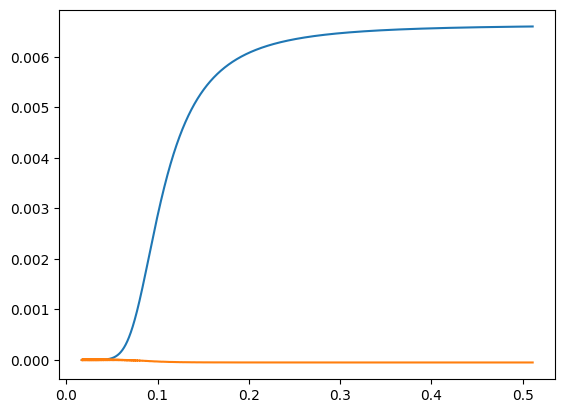

In [46]:
plt.plot(xs, fs[0,:])
plt.plot(xs, fs[1,:]-1)

In [52]:
file_name = "results/results_" + str(round(theta0, 5)) + "_" + str(round(dm2, 5)) + ".txt"

stacked = np.loadtxt(file_name)
P0s = stacked[0,:]
Pxs = stacked[1,:]
Pys = stacked[2,:]
Pzs = stacked[3,:]
Bxs = stacked[4,:]
Bys = stacked[5,:]
Bzs = stacked[6,:]
xs_exact = stacked[7,:]
zs_exact = stacked[8,:]

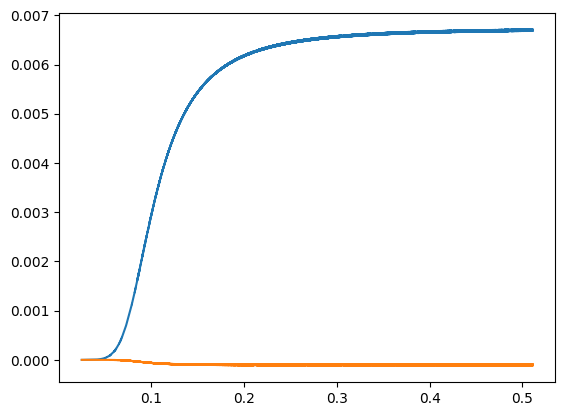

In [48]:
plt.plot(xs, (P0s-Pzs)/2)
plt.plot(xs, (P0s+Pzs)/2-1)

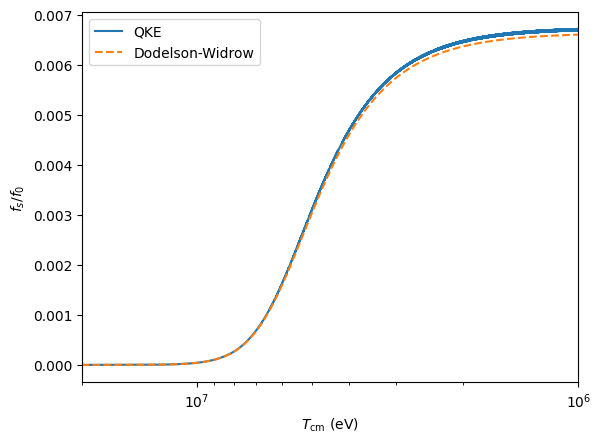

In [61]:
plt.semilogx(m_e/xs_exact, (P0s-Pzs)/2, label="QKE")
plt.semilogx(m_e/xs, fs[0,:], ls="--", label="Dodelson-Widrow")

plt.xlim(2e7,1e6)
plt.xlabel(r"$T_\mathrm{cm} \ \mathrm{(eV)}$")
plt.ylabel(r"$f_s/f_0$")
plt.legend()

plt.tight_layout()
plt.savefig(f"{dm2}_{theta0}_exact_approximate_comparison.pdf")

In [64]:
print(str(dm2))
print(f'{dm2}_{theta0}_results') # look up options for scientific notation eg

0.01
0.01_0.01_results


find paper with evol equation and see final values of fs

on poster:
write down equations that i am solving
compare exact and approx
if disagreement is big: not worth presenting
    talk in two parts:
    1. talk about toy model, msw
    2. show sterile for just exact or just approximate, state working on improving model
if disagreement is small: great!

with exact precession code: change nxrange, atol/rtol

plot only fs component
use both approximate and exact on same plot

two plots: small mixing angle and large mixing angle
show that higher mixing angle -> higher conversion

show the resonant wrong thing, might be interesting

throw in the neutrino term, should delay the transition a little